<a href="https://colab.research.google.com/github/IDF13/mulcam_army/blob/sumin/%EC%95%85%ED%94%8C%EB%B6%84%EB%A5%98%EC%BD%94%EB%93%9C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive 
drive.mount('/content/gdrive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive/


In [ ]:
cd '/content/gdrive/My Drive/미니프로젝트'

/content/gdrive/.shortcut-targets-by-id/1VOm1kx8UFvcX65eqxWHO10iSX_m5fda1/미니프로젝트


In [ ]:
ls

 코드/                  Comments_data.csv
 데이터/                Comments_data.gsheet
'best_model (1).h5'    '악플분류코드(랜덤포레스트).ipynb'
 best_model.h5         'LSTM 결과.txt'
 best_model_raw_v2.h5   model.png
 best_model_v2.h5       ngrok-stable-linux-amd64.zip
 best_model_v3.h5       tb_logs/


In [ ]:
import pandas as pd 

In [ ]:
df = pd.read_csv('Comments_data.csv')
df = df.iloc[:, 1:3]
df = df.dropna()

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X = []
for x in df['Comment']:
  X.append([x])

In [ ]:
y = []
for i in df['Label']:
  y.append(i)

In [ ]:
train_X, test_X, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 전처리

In [ ]:
!pip install konlpy

     |████████████████████████████████| 19.4MB 1.5MB/s 
     |████████████████████████████████| 92kB 9.1MB/s 
     |████████████████████████████████| 3.8MB 43.0MB/s 
  Found existing installation: beautifulsoup4 4.6.3
    Uninstalling beautifulsoup4-4.6.3:
      Successfully uninstalled beautifulsoup4-4.6.3
  Found existing installation: tweepy 3.6.0
    Uninstalling tweepy-3.6.0:
      Successfully uninstalled tweepy-3.6.0


In [ ]:
import pandas as pd
import urllib.request
%matplotlib inline
import matplotlib.pyplot as plt
import re
from konlpy.tag import Okt
from tensorflow.keras.preprocessing.text import Tokenizer
import numpy as np
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [ ]:
#이모티콘 제거
emoji_pattern = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           "]+", flags=re.UNICODE)

#분석에 어긋나는 불용어구 제외 (특수문자, 의성어)
han = re.compile(r'[ㄱ-ㅎㅏ-ㅣ!?~,".\n\r#\ufeff\u200d]')

In [ ]:
def preprocess(s):
  comment_result = []
  for comment in s:
      tokens = re.sub(emoji_pattern,"",comment[0])
      tokens = re.sub(han,"",tokens)
      comment_result.append([tokens])
  return comment_result 

In [ ]:
train_X = preprocess(train_X)
test_X = preprocess(test_X)

In [ ]:
stopwords = ['의','가','이','은','들','는','좀','잘','걍','과','도','를','으로','자','에','와','한','하다']
okt = Okt()
X_train = []
for sentence in train_X:
    temp_X = []
    temp_X = okt.morphs(sentence[0], stem=True) # 토큰화
    temp_X = [word for word in temp_X if not word in stopwords] # 불용어 제거
    print(temp_X)
    X_train.append(temp_X)

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
['딱', '걸리다', '그냥']
['신의한수', '당신', '있다', '때문', '민주당', '늘', '행복하다', '왜냐면', '선거', '마다', '이기다', '말', '안되다', '그런', '방송', '을', '때', '마다', '국민', '돌아서다', '경험', '해보다', '참으로', '한심하다', '것']
['진짜', '감사하다', '근데', '문', '재', '이니', '니', '왜', '이제', '서다', '이슈', '화', '시키다', '딧북', '이냐', '뒤', '에서', '개', '헛', '짓거리', '말고', '고마', '사람', '말좀', '들다']
['고민정', '너', '가드', '섬뜩하다', '자서', '고', '부정선거']
['좌파', '대부분', '여자', '돈', '문제', '많다', '좌측', '다른', '지자체', '장', '기관', '장', '정치인', '앞', '차차', '들다', '날다']
['과로사', '팬티', '입', '을', '때', "'", '그', '곳', "'", '빼다', '입', '나', '보다', '마스크', '코', '밑', '있다']
['진정하다', '애국자', '다', '실천', '하', 'd', '애', '국민', '민통당', '의원', '보다', '훌륭하다']
['자기', '사드', '갖다', '온갖', '추태', '부리다', '우린', '안', '잊어버리다']
['최근', '축구', '접', '잼민', '들다', '해축', '보고', '쓸데없이', '눈', '만', '높아지다', '국', '대', '직관', '가면', '손흥민', '포함', '그', '라운드', '11', '명중', '가장', '돋보이다', '선수', '기성용', '임', '그냥', '국', '대', '에서도', '특출나다', '크다', '쓰다', '다른', '선수', '다', '거임']
['04:50', '손흥민', '하이라이트']
['우리나라', '정치

In [ ]:
X_test = []
for sentence in test_X:
    temp_X = []
    temp_X = okt.morphs(sentence[0], stem=True) # 토큰화
    temp_X = [word for word in temp_X if not word in stopwords] # 불용어 제거
    X_test.append(temp_X)

In [ ]:
import tensorflow as tf
from keras.utils import to_categorical

Using TensorFlow backend.


In [ ]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# 정수인코딩

In [ ]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)

In [ ]:
threshold = 3
total_cnt = len(tokenizer.word_index) # 단어의 수
rare_cnt = 0 # 등장 빈도수가 threshold보다 작은 단어의 개수를 카운트
total_freq = 0 # 훈련 데이터의 전체 단어 빈도수 총 합
rare_freq = 0 # 등장 빈도수가 threshold보다 작은 단어의 등장 빈도수의 총 합

# 단어와 빈도수의 쌍(pair)을 key와 value로 받는다.
for key, value in tokenizer.word_counts.items():
    total_freq = total_freq + value

    # 단어의 등장 빈도수가 threshold보다 작으면
    if(value < threshold):
        rare_cnt = rare_cnt + 1
        rare_freq = rare_freq + value

print('단어 집합(vocabulary)의 크기 :',total_cnt)
print('등장 빈도가 %s번 이하인 희귀 단어의 수: %s'%(threshold - 1, rare_cnt))
print("단어 집합에서 희귀 단어의 비율:", (rare_cnt / total_cnt)*100)
print("전체 등장 빈도에서 희귀 단어 등장 빈도 비율:", (rare_freq / total_freq)*100)

단어 집합(vocabulary)의 크기 : 32674
등장 빈도가 2번 이하인 희귀 단어의 수: 19495
단어 집합에서 희귀 단어의 비율: 59.66517720511722
전체 등장 빈도에서 희귀 단어 등장 빈도 비율: 4.034173246104934


In [ ]:
# 전체 단어 개수 중 빈도수 2이하인 단어 개수는 제거.
# 0번 패딩 토큰과 1번 OOV 토큰을 고려하여 +2
vocab_size = total_cnt - rare_cnt + 2
print('단어 집합의 크기 :',vocab_size)

단어 집합의 크기 : 13181


In [ ]:
tokenizer = Tokenizer(vocab_size, oov_token = 'OOV') 
tokenizer.fit_on_texts(X_train)
X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)

In [ ]:
print(X_train[:3])

[[152, 5427, 1, 24, 1653, 4, 187, 62, 944, 600, 21, 418, 1022, 7, 7391, 5428, 4], [9, 10835, 5, 47, 121, 14], [99, 2000, 337, 5]]


# 빈 샘플들 제거

In [ ]:
drop_train = [index for index, sentence in enumerate(X_train) if len(sentence) < 1]

In [ ]:
# 빈 샘플들을 제거
X_train = np.delete(X_train, drop_train, axis=0)
y_train = np.delete(y_train, drop_train, axis=0)
print(len(X_train))
print(len(y_train))

47464
47464


# 패딩

리뷰의 최대 길이 : 1765
리뷰의 평균 길이 : 12.517887240856227


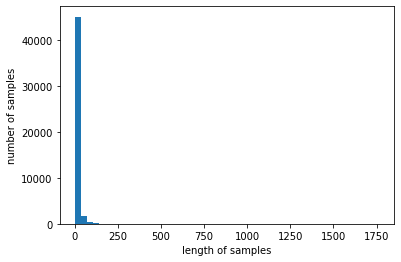

In [ ]:
print('리뷰의 최대 길이 :',max(len(l) for l in X_train))
print('리뷰의 평균 길이 :',sum(map(len, X_train))/len(X_train))
plt.hist([len(s) for s in X_train], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

In [ ]:
def below_threshold_len(max_len, nested_list):
  cnt = 0
  for s in nested_list:
    if(len(s) <= max_len):
        cnt = cnt + 1
  print('전체 샘플 중 길이가 %s 이하인 샘플의 비율: %s'%(max_len, (cnt / len(nested_list))*100))

In [ ]:
max_len = 30
below_threshold_len(max_len, X_train)

전체 샘플 중 길이가 30 이하인 샘플의 비율: 92.81771447834149


In [ ]:
X_train = pad_sequences(X_train, maxlen = max_len)
X_test = pad_sequences(X_test, maxlen = max_len)

# LSTM 으로 악플 분류

In [ ]:
from tensorflow.keras.layers import Embedding, Dense, LSTM
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import load_model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [ ]:
model = Sequential()
model.add(Embedding(vocab_size, 100))
model.add(LSTM(128))
model.add(Dense(3, activation='softmax'))

In [ ]:
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=4)
mc = ModelCheckpoint('best_model_raw_v2.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)

In [ ]:
import tensorflow as tf

In [ ]:
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['acc', tf.keras.metrics.Recall(), tf.keras.metrics.Precision()])
history = model.fit(X_train, y_train, epochs=15, callbacks=[es, mc], batch_size=60, validation_split=0.2)

Epoch 1/15
633/633 [==============================] - ETA: 0s - loss: 0.2622 - acc: 0.9407 - recall: 0.9377 - precision: 0.9411
Epoch 00001: val_acc improved from -inf to 0.93690, saving model to best_model_raw_v2.h5
633/633 [==============================] - 11s 18ms/step - loss: 0.2622 - acc: 0.9407 - recall: 0.9377 - precision: 0.9411 - val_loss: 0.2688 - val_acc: 0.9369 - val_recall: 0.9369 - val_precision: 0.9372
Epoch 2/15
632/633 [============================>.] - ETA: 0s - loss: 0.2393 - acc: 0.9414 - recall: 0.9413 - precision: 0.9414
Epoch 00002: val_acc did not improve from 0.93690
633/633 [==============================] - 9s 13ms/step - loss: 0.2396 - acc: 0.9413 - recall: 0.9412 - precision: 0.9413 - val_loss: 0.2656 - val_acc: 0.9369 - val_recall: 0.9369 - val_precision: 0.9369
Epoch 3/15
629/633 [============================>.] - ETA: 0s - loss: 0.2309 - acc: 0.9412 - recall: 0.9409 - precision: 0.9418
Epoch 00003: val_acc did not improve from 0.93690
633/633 [=========

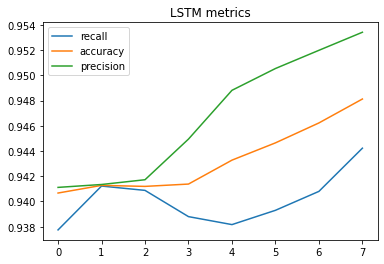

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(history.history['recall'], label = 'recall')
plt.plot(history.history['acc'], label = 'accuracy')
plt.plot(history.history['precision'], label = 'precision')
plt.legend(['recall','accuracy','precision'])
plt.title('LSTM metrics')
plt.show()

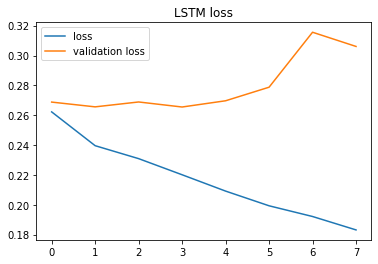

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['loss', 'validation loss'])
plt.title('LSTM loss')
plt.show()

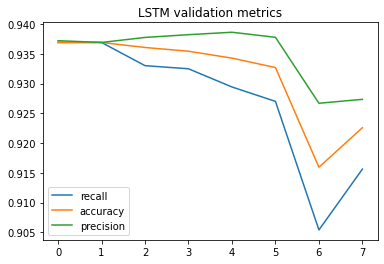

In [ ]:
plt.plot(history.history['val_recall'])
plt.plot(history.history['val_acc'])
plt.plot(history.history['val_precision'])
plt.legend(['recall','accuracy','precision'])
plt.title('LSTM validation metrics')
plt.show()

In [ ]:
X_test[:5]
y_test[:5]

In [ ]:
loaded_model = load_model('best_model_raw_v2.h5')
loaded_model.evaluate(X_test,np.array(y_test))

642/642 [==============================] - 3s 5ms/step - loss: 0.2578 - acc: 0.9394 - recall: 0.9394 - precision: 0.9394


[0.2578461766242981, 0.9394190311431885, 0.939370334148407, 0.9394161105155945]

In [ ]:
for i in y_test:
  x = 1
  i == 2
  